In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [ ]:
!pip install librosa

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
filename = '/content/drive/MyDrive/UrbanSound8K/4912-3-2-0.wav'

In [ ]:
import IPython.display as ipd
import librosa
import librosa.display

In [ ]:
!dir

drive  sample_data


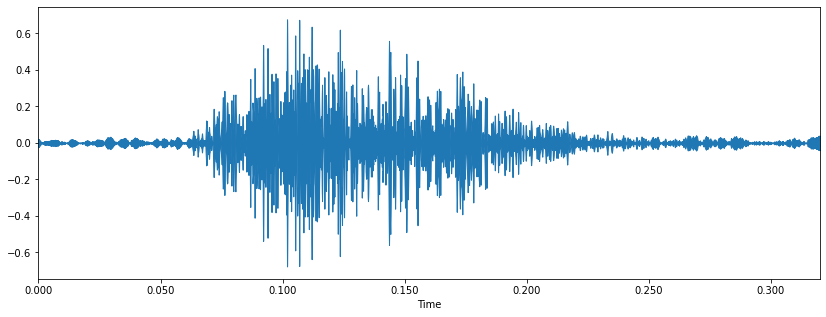

In [ ]:
### Dog Sound
plt.figure(figsize=(14,5))
data, sample_rate = librosa.load(filename)
librosa.display.waveplot(data,sr=sample_rate)
ipd.Audio(filename)

In [ ]:
sample_rate

22050

In [ ]:
from scipy.io import wavfile as wav
wave_sample_rate, wave_audio=wav.read(filename)

In [ ]:
wave_sample_rate

44100

In [ ]:
wave_audio.shape

(14112, 2)

In [ ]:
data

array([0.01394971, 0.02196648, 0.01937516, ..., 0.04010148, 0.03881488,
       0.03931562], dtype=float32)

In [ ]:
import pandas as pd
metadata=pd.read_csv('/content/drive/MyDrive/UrbanSound8K/metadata/UrbanSound8K.csv')
metadata.head(10)

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.000000,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.500000,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.500000,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.000000,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.500000,72.500000,1,5,2,children_playing
5,100263-2-0-143.wav,100263,71.500000,75.500000,1,5,2,children_playing
6,100263-2-0-161.wav,100263,80.500000,84.500000,1,5,2,children_playing
7,100263-2-0-3.wav,100263,1.500000,5.500000,1,5,2,children_playing
8,100263-2-0-36.wav,100263,18.000000,22.000000,1,5,2,children_playing
9,100648-1-0-0.wav,100648,4.823402,5.471927,2,10,1,car_horn


In [ ]:
### Check whether the dataset is imbalanced
metadata['class'].value_counts()

drilling            1000
engine_idling       1000
children_playing    1000
street_music        1000
air_conditioner     1000
jackhammer          1000
dog_bark            1000
siren                929
car_horn             429
gun_shot             374
Name: class, dtype: int64

In [ ]:
### Let's read a sample audio using librosa
import librosa
audio_file_path = '/content/drive/MyDrive/UrbanSound8K/audio/fold1/103074-7-1-4.wav'
librosa_audio_data,librosa_sample_rate=librosa.load(audio_file_path)
print(librosa_audio_data)

[ 0.01087788  0.01906841  0.00812459 ... -0.03129252 -0.02771373
 -0.03455878]


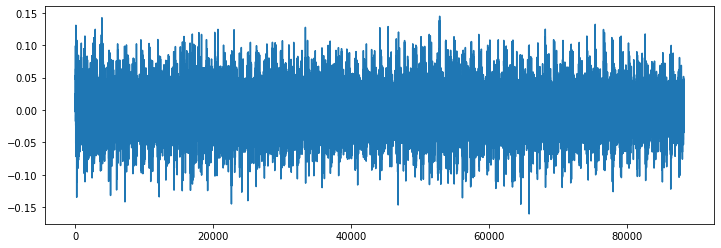

In [ ]:
### Lets plot the librosa audio data
import matplotlib.pyplot as plt
# Original audio with 1 channel 
plt.figure(figsize=(12, 4))
plt.plot(librosa_audio_data)

In [ ]:
# ### Lets read with scipy
# from scipy.io import wavfile as wav
# wave_sample_rate, wave_audio = wav.read(audio_file_path)

In [ ]:
mfccs = librosa.feature.mfcc(y=librosa_audio_data, sr=librosa_sample_rate, n_mfcc=40)
print(mfccs.shape)

In [ ]:
mfccs

array([[-1.2358708e+02, -1.3713437e+02, -1.4745897e+02, ...,
        -1.7918829e+02, -1.6485466e+02, -1.8289935e+02],
       [ 6.7647415e+01,  7.3306686e+01,  7.7241615e+01, ...,
         8.9534912e+01,  7.9223907e+01,  8.5880867e+01],
       [-3.1357729e-01, -2.8049047e+00,  1.5517766e+00, ...,
         3.6890550e+00,  5.5644140e+00, -5.1440773e+00],
       ...,
       [ 1.2521625e-01, -3.5396800e+00, -4.2219460e-01, ...,
         2.1808209e+00, -5.2966398e-01,  2.3204200e+00],
       [-9.6971397e+00, -9.7367420e+00, -8.2867498e+00, ...,
        -5.5805001e+00, -4.5169859e+00, -2.1831956e+00],
       [-5.2831707e+00, -1.6028404e+00,  1.3567169e+00, ...,
        -1.9070220e-01, -8.4631115e-02,  8.3457494e-01]], dtype=float32)

In [ ]:
#### Extracting MFCC's For every audio file
import pandas as pd
import os
import librosa
audio_dataset_path='/content/drive/MyDrive/UrbanSound8K/audio/'
metadata=pd.read_csv('/content/drive/MyDrive/UrbanSound8K/metadata/UrbanSound8K.csv')
metadata.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [ ]:
def features_extractor(file):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    return mfccs_scaled_features

In [ ]:
import numpy as np
from tqdm import tqdm
### Now we iterate through every audio file and extract features 
### using Mel-Frequency Cepstral Coefficients
extracted_features=[]
for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    final_class_labels=row["class"]
    data=features_extractor(file_name)
    extracted_features.append([data,final_class_labels])

3555it [42:49,  1.46it/s]/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1323
  n_fft, y.shape[-1]
8326it [1:38:16,  2.08it/s]/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1103
  n_fft, y.shape[-1]
8329it [1:38:17,  2.06it/s]/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1523
  n_fft, y.shape[-1]
8732it [1:42:25,  1.42it/s]


In [ ]:
### converting extracted_features to Pandas dataframe
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()

,feature,class
0,"[-215.79301, 71.66612, -131.81377, -52.09133, ...",dog_bark
1,"[-424.68677, 110.56227, -54.148235, 62.01074, ...",children_playing
2,"[-459.56467, 122.800354, -47.92471, 53.265705,...",children_playing
3,"[-414.55377, 102.896904, -36.66495, 54.18041, ...",children_playing
4,"[-447.397, 115.0954, -53.809113, 61.60859, 1.6...",children_playing


In [ ]:
### Split the dataset into independent and dependent dataset
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())

In [ ]:
X.shape

(8732, 40)

In [ ]:
y

array(['dog_bark', 'children_playing', 'children_playing', ...,
       'car_horn', 'car_horn', 'car_horn'], dtype='<U16')

In [ ]:
### Label Encoding
###y=np.array(pd.get_dummies(y))
### Label Encoder
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))

In [ ]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
### Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
X_train

array([[-1.3183614e+02,  1.1397464e+02, -2.3956861e+01, ...,
         3.3314774e+00, -1.4786111e+00,  2.8736601e+00],
       [-1.4074220e+01,  9.1916939e+01, -8.6787205e+00, ...,
        -3.3844025e+00, -5.2119040e+00, -1.5936139e+00],
       [-4.9532028e+01,  1.5521857e-01, -2.0369110e+01, ...,
         2.0491767e+00, -8.0537486e-01,  2.7793026e+00],
       ...,
       [-4.2699329e+02,  9.2890648e+01,  3.0233369e+00, ...,
         8.6335993e-01,  6.4766800e-01,  7.8490508e-01],
       [-1.4607024e+02,  1.3709459e+02, -3.4298344e+01, ...,
         1.3777871e+00, -1.9530842e+00, -8.9652115e-01],
       [-4.2167450e+02,  2.1169032e+02,  2.6820304e+00, ...,
        -5.1484952e+00, -3.6400859e+00, -1.3321606e+00]], dtype=float32)

In [ ]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
X_train.shape

(6985, 40)

In [ ]:
X_test.shape

(1747, 40)

In [ ]:
y_train.shape

(6985, 10)

In [ ]:
y_test.shape

(1747, 10)

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.5.0


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [ ]:
### No of classes
num_labels=y.shape[1]

In [ ]:
model=Sequential()
###first layer
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               4100      
_________________________________________________________________
activation (Activation)      (None, 100)               0         
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 200)               20200     
_________________________________________________________________
activation_1 (Activation)    (None, 200)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               2

In [ ]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [ ]:
## Trianing my model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 
num_epochs = 100
num_batch_size = 32
checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()
model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)
duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/100
219/219 [==============================] - 2s 4ms/step - loss: 9.5017 - accuracy: 0.1210 - val_loss: 2.2889 - val_accuracy: 0.1185

Epoch 00001: val_loss improved from inf to 2.28888, saving model to saved_models/audio_classification.hdf5
Epoch 2/100
219/219 [==============================] - 1s 3ms/step - loss: 2.5279 - accuracy: 0.1224 - val_loss: 2.2788 - val_accuracy: 0.1156

Epoch 00002: val_loss improved from 2.28888 to 2.27880, saving model to saved_models/audio_classification.hdf5
Epoch 3/100
219/219 [==============================] - 1s 3ms/step - loss: 2.3319 - accuracy: 0.1361 - val_loss: 2.2336 - val_accuracy: 0.1586

Epoch 00003: val_loss improved from 2.27880 to 2.23356, saving model to saved_models/audio_classification.hdf5
Epoch 4/100
219/219 [==============================] - 1s 3ms/step - loss: 2.2526 - accuracy: 0.1606 - val_loss: 2.1737 - val_accuracy: 0.1769

Epoch 00004: val_loss improved from 2.23356 to 2.17374, saving model to saved_models/audio_clas

In [ ]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.7424155473709106


In [ ]:
# prediction_feature.shape

In [ ]:
X_test[1]

array([-466.1843    ,    1.5388287 ,  -34.397358  ,   35.715336  ,
        -15.16693   ,  -18.850813  ,   -0.7415814 ,  -15.999888  ,
        -21.354332  ,    7.650683  ,  -29.03145   ,  -19.142824  ,
         -2.6798913 ,   -8.466883  ,  -14.7660475 ,   -7.004778  ,
         -7.103754  ,    8.887754  ,   14.911873  ,   21.47102   ,
         21.336626  ,    0.9169517 ,  -18.795404  ,   -5.001721  ,
         -0.70152706,    2.9139898 ,   -6.710599  ,  -16.638536  ,
         -9.821647  ,   12.8619585 ,    0.6552978 ,  -23.953394  ,
        -15.200551  ,    9.210791  ,   10.419799  ,   -0.57916135,
         -1.2440345 ,   17.722294  ,   13.837573  ,   -5.164349  ],
      dtype=float32)

In [ ]:
model.predict_classes(X_test)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([5, 3, 4, ..., 1, 0, 0])

# **Test con audio distinto**

In [ ]:
/content/drive/MyDrive/UrbanSound8K/4912-3-2-0.wav

In [ ]:
# filename="UrbanSound8K/drilling_1.wav"
filename="/content/drive/MyDrive/UrbanSound8K/4912-3-2-0.wav"
audio, sample_rate = librosa.load(filename, res_type='kaiser_fast') 
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)

print(mfccs_scaled_features)
mfccs_scaled_features=mfccs_scaled_features.reshape(1,-1)
print(mfccs_scaled_features)
print(mfccs_scaled_features.shape)
predicted_label=model.predict_classes(mfccs_scaled_features)
print(predicted_label)
prediction_class = labelencoder.inverse_transform(predicted_label) 
prediction_class

[-231.80989     156.01765     -23.767895     -2.2078047   -10.141893
    6.6530557    -5.55489       7.111721    -14.423868      9.011194
   -6.963746     18.432863     -0.833769     18.274015      4.14636
    2.5054839    -0.5414406    18.270512      1.3276618    -0.97715324
    0.71530354    3.1086853    -1.9693165     3.4965312     3.5065286
   -0.6829969     1.5426481    -8.150081     -6.314199     -0.2862089
    5.753205      4.6388083     2.8528807     3.3491673     4.911269
   -3.518953     -0.8752972    -2.0177858    -1.6757194    -5.863969  ]
[[-231.80989     156.01765     -23.767895     -2.2078047   -10.141893
     6.6530557    -5.55489       7.111721    -14.423868      9.011194
    -6.963746     18.432863     -0.833769     18.274015      4.14636
     2.5054839    -0.5414406    18.270512      1.3276618    -0.97715324
     0.71530354    3.1086853    -1.9693165     3.4965312     3.5065286
    -0.6829969     1.5426481    -8.150081     -6.314199     -0.2862089
     5.753205      

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array(['dog_bark'], dtype='<U16')